In [80]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [81]:
img=cv2.imread('C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/test_images/9.jpg')
img.shape

(904, 602, 3)

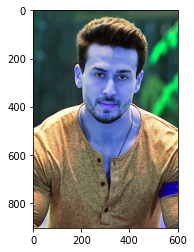

In [82]:
plt.imshow(img)

In [83]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(904, 602)

In [84]:
gray

array([[ 56,  49,  50, ...,  97,  90,  91],
       [ 44,  44,  51, ...,  96,  91,  92],
       [ 46,  52,  59, ...,  97,  95,  96],
       ...,
       [122, 123, 125, ...,  81,  58,  41],
       [ 72,  71,  70, ...,  15,   4,  17],
       [112, 124, 149, ...,   4,  21,  69]], dtype=uint8)

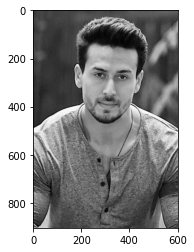

In [85]:
plt.imshow(gray, cmap='gray')

In [86]:
face_cascade=cv2.CascadeClassifier('C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/opencv/haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[180, 165, 284, 284]])

In [87]:
(x,y,w,h)=faces[0]
x,y,w,h

(180, 165, 284, 284)

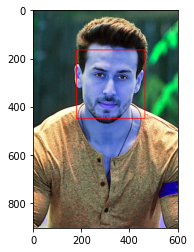

In [88]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

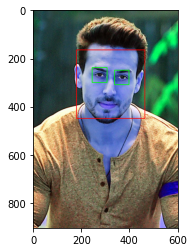

In [89]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

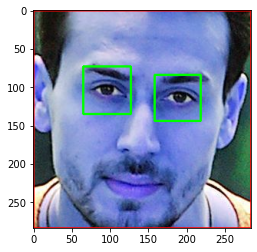

In [90]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [91]:
cropped_img=np.array(roi_color)
cropped_img.shape

(284, 284, 3)

In [92]:
import numpy as np
import pywt
import cv2    

def w2d(img,mode='haar',level=1):
    imArray=img
    #Datatype conversions
    #convert to grayscale
    imArray=cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray=np.float32(imArray)   
    imArray/=255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)

    return imArray_H

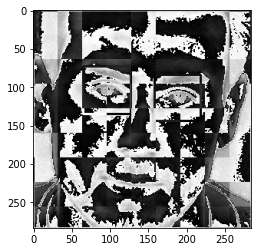

In [93]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

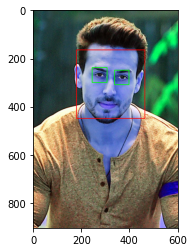

In [94]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
plt.imshow(img)

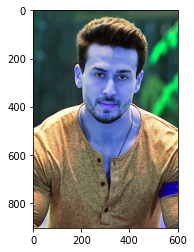

In [95]:
original_image=cv2.imread('C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/test_images/9.jpg')
plt.imshow(original_image)

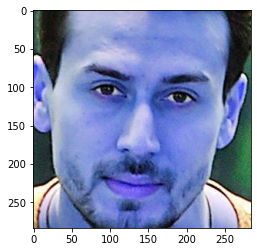

In [96]:
cropped_image=get_cropped_image_if_2_eyes('C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/test_images/9.jpg')
plt.imshow(cropped_image)

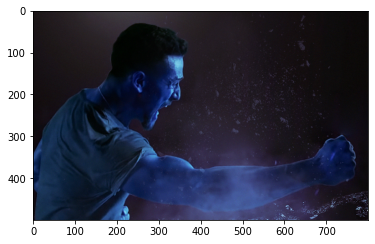

In [98]:
org_image_obstructed=cv2.imread('C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/test_images/18.jpg')
plt.imshow(org_image_obstructed)

In [106]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/test_images/18.jpg')
cropped_image_no_2_eyes

In [112]:
path_to_data="C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/"
path_to_cr_data="C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/"

In [113]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [114]:
img_dirs

['C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped',
 'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/Mahesh_Babu',
 'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/Pawan_Kalyan',
 'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/Stylish_Star',
 'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/Tiger_Shroff']

In [115]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [116]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

Generating cropped images in folder:  C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu
Generating cropped images in folder:  C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Pawan_Kalyan
Generating cropped images in folder:  C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Stylish_Star
Generating cropped images in folder:  C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Tiger_Shroff


In [117]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'Mahesh_Babu': ['C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu\\Mahesh_Babu1.png',
  'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu\\Mahesh_Babu10.png',
  'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu\\Mahesh_Babu11.png',
  'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu\\Mahesh_Babu12.png',
  'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu\\Mahesh_Babu13.png',
  'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu\\Mahesh_Babu14.png',
  'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cropped/Mahesh_Babu\\Mahesh_Babu15.png',
  'C:/Users/Chandu/OneDrive/Desktop/Sports-image-classifier-master/model/image_dataset/cro

In [120]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count + 1
class_dict

{'Mahesh_Babu': 0, 'Pawan_Kalyan': 1, 'Stylish_Star': 2, 'Tiger_Shroff': 3}

In [121]:
X,y=[],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img, (32, 32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har, (32, 32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [122]:
len(X[0])

4096

In [123]:
32*32*3 + 32*32

4096

In [124]:
X[0]

array([[145],
       [168],
       [213],
       ...,
       [  5],
       [252],
       [252]], dtype=uint8)

In [125]:
y[0]

0

In [126]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(296, 4096)

In [127]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.6486486486486487

In [129]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.74      0.60        19
           1       0.67      0.57      0.62        14
           2       0.67      0.59      0.62        17
           3       0.84      0.67      0.74        24

    accuracy                           0.65        74
   macro avg       0.67      0.64      0.65        74
weighted avg       0.68      0.65      0.65        74



In [130]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [131]:
model_params = {
    'svm': {
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }  
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [132]:
scores=[]
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe, mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.742626,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.540505,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.715657,{'logisticregression__C': 5}


In [133]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [134]:
best_estimators['svm'].score(X_test,y_test)

0.7027027027027027

In [135]:
best_estimators['random_forest'].score(X_test,y_test)

0.5405405405405406

In [136]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6891891891891891

In [137]:
best_clf = best_estimators['svm']

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  2,  0,  2],
       [ 3,  9,  0,  2],
       [ 2,  2, 11,  2],
       [ 2,  0,  5, 17]], dtype=int64)

Text(69.0, 0.5, 'Truth')

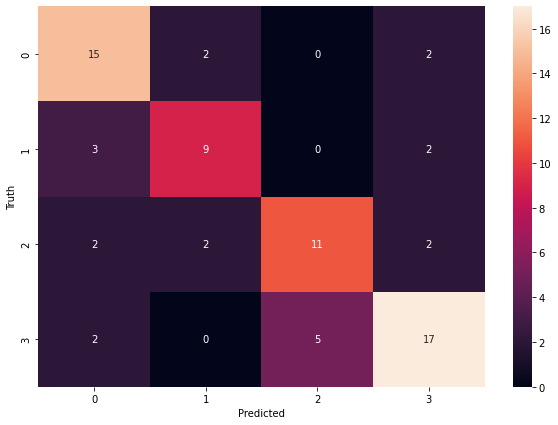

In [139]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [140]:
class_dict

{'Mahesh_Babu': 0, 'Pawan_Kalyan': 1, 'Stylish_Star': 2, 'Tiger_Shroff': 3}

In [141]:
!pip install joblib
import joblib 
joblib.dump(best_clf, 'saved_model.pkl') 

You should consider upgrading via the 'c:\users\chandu\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


['saved_model.pkl']

In [142]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))